## GBM 10xsnRNA-seq dataset

Droplet-based single-nuclei RNA-seq data (snRNA-seq) on an astrocytoma sample (a subtype of Glioblastoma Multiforme (GBM)), covering 4,416 cells from 9 cell groups as annotated from the [original study](https://www.science.org/doi/10.1126/sciadv.abp8901). Uniquely, this is a second recurrent (2R) astrocytoma patient sample with IDH1-(R132H mutation, reported as a prominent case study in the newly developed [scOne-seq technology](https://www.science.org/doi/10.1126/sciadv.abp8901).

Download the notebook by clicking on the [Download GBM 10xsnRNA-seq demo Notebook](https://github.com/Rongtingting/xclone-data/tree/main/examples/GBM_10XsnRNA_XClone_demo.ipynb).

In [1]:
import xclone
import anndata as an
import pandas as pd
import numpy as np
import scipy
scipy.__version__
xclone.pp.efficiency_preview()

(Running XClone 0.3.5)
2023-12-23 03:02:20
[XClone efficiency] multiprocessing cpu total count in your device 88


In [2]:
## load data
### rdr
RDR_adata = xclone.data.gbm10x_rdr()

### baf
BAF_adata = xclone.data.gbm10x_baf()

load the GBM_10XsnRNA rdr data from downloaded file.
load the GBM_10XsnRNA baf data from downloaded file.


In [3]:
dataset_name = "GBM_10XsnRNA"
out_dir = "/groups/cgsd/rthuang/Results/GBM/demoresults/"

In [4]:
# create a dictionary to map cluster to annotation label
annotation_map = {
    'Clone_2nd':"Clone1 (2R)",
    'GFAP_GBM':'GFAP_GBM',
    'MEGF11_GBM':'MEGF11_GBM', 
     'VEGFA_GBM':'VEGFA_GBM',
     "Normal": 'Reference'}
RDR_adata.obs['cell_anno'] =RDR_adata.obs['cell_type'].map(annotation_map).astype('category')
BAF_adata.obs['cell_anno'] =BAF_adata.obs['cell_type'].map(annotation_map).astype('category')

RDR 
Configurations:
HMM_brk                        chr_arm
KNN_neighbors                  10
WMA_smooth_key                 chr_arm
WMA_window_size                40
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /groups/cgsd/rthuang/Results/GBM/demoresults
_plot_suffix                   
_start                         1703300553.7261324
_vector_friendly               True
cell_anno_key                  cell_type
dataset_name                   GBM_10XsnRNA
dispersion_celltype            None
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
filter_ref_ave                 0.5
fit_GLM_libratio               False
gene_exp_group                 1
gene_exp_ref_log               True
guide_chr_anno_key             chr_arm
guide_cnv_ratio                None
guide_qt_lst                   [0.0001, 0.96, 0.99]
marker_group_anno_key          phen

Trying to set attribute `.var` of view, copying.


output anndata is not sparse matrix.


Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


[XClone RDR gene dispersion fitting] Time used: 87 seconds
[XClone RDR gene-specific dispersion]: checking
max_value: inf
min_value: 0.0
qt_0.95_value: 5.414710127444081
qt_0.05_value: 0.1577988988482126
remove no GLM results genes num: 0
remove inf dispersion genes num: 5
[XClone RDR dispersion]: clipping
[XClone RDR gene-specific dispersion]: checking
max_value: 4.220431650578646
min_value: 0.11192925730427881
qt_0.95_value: 4.220431650578646
qt_0.05_value: 0.157702192331162
[XClone hint] RDR_base_file and bulk_file saved in /groups/cgsd/rthuang/Results/GBM/demoresults/data/.
make WMA connectivities matrix, saved in varp[WMA_connect].
[XClone] RDR CNV states chrs guiding(copy loss, copy neutral, copy gain): ['9p', '20q', '19p']
CNV loss:  0.5590059878646195
CNV neutral:  1.1090124610450278
CNV gain:  1.6086051373339014
[XClone] RDR CNV states ratio guiding(copy loss, copy neutral, copy gain): [0.55900599 1.10901246 1.60860514]
expression_brk [-0.69238585  5.014507  ]
[XClone] CNV_opt

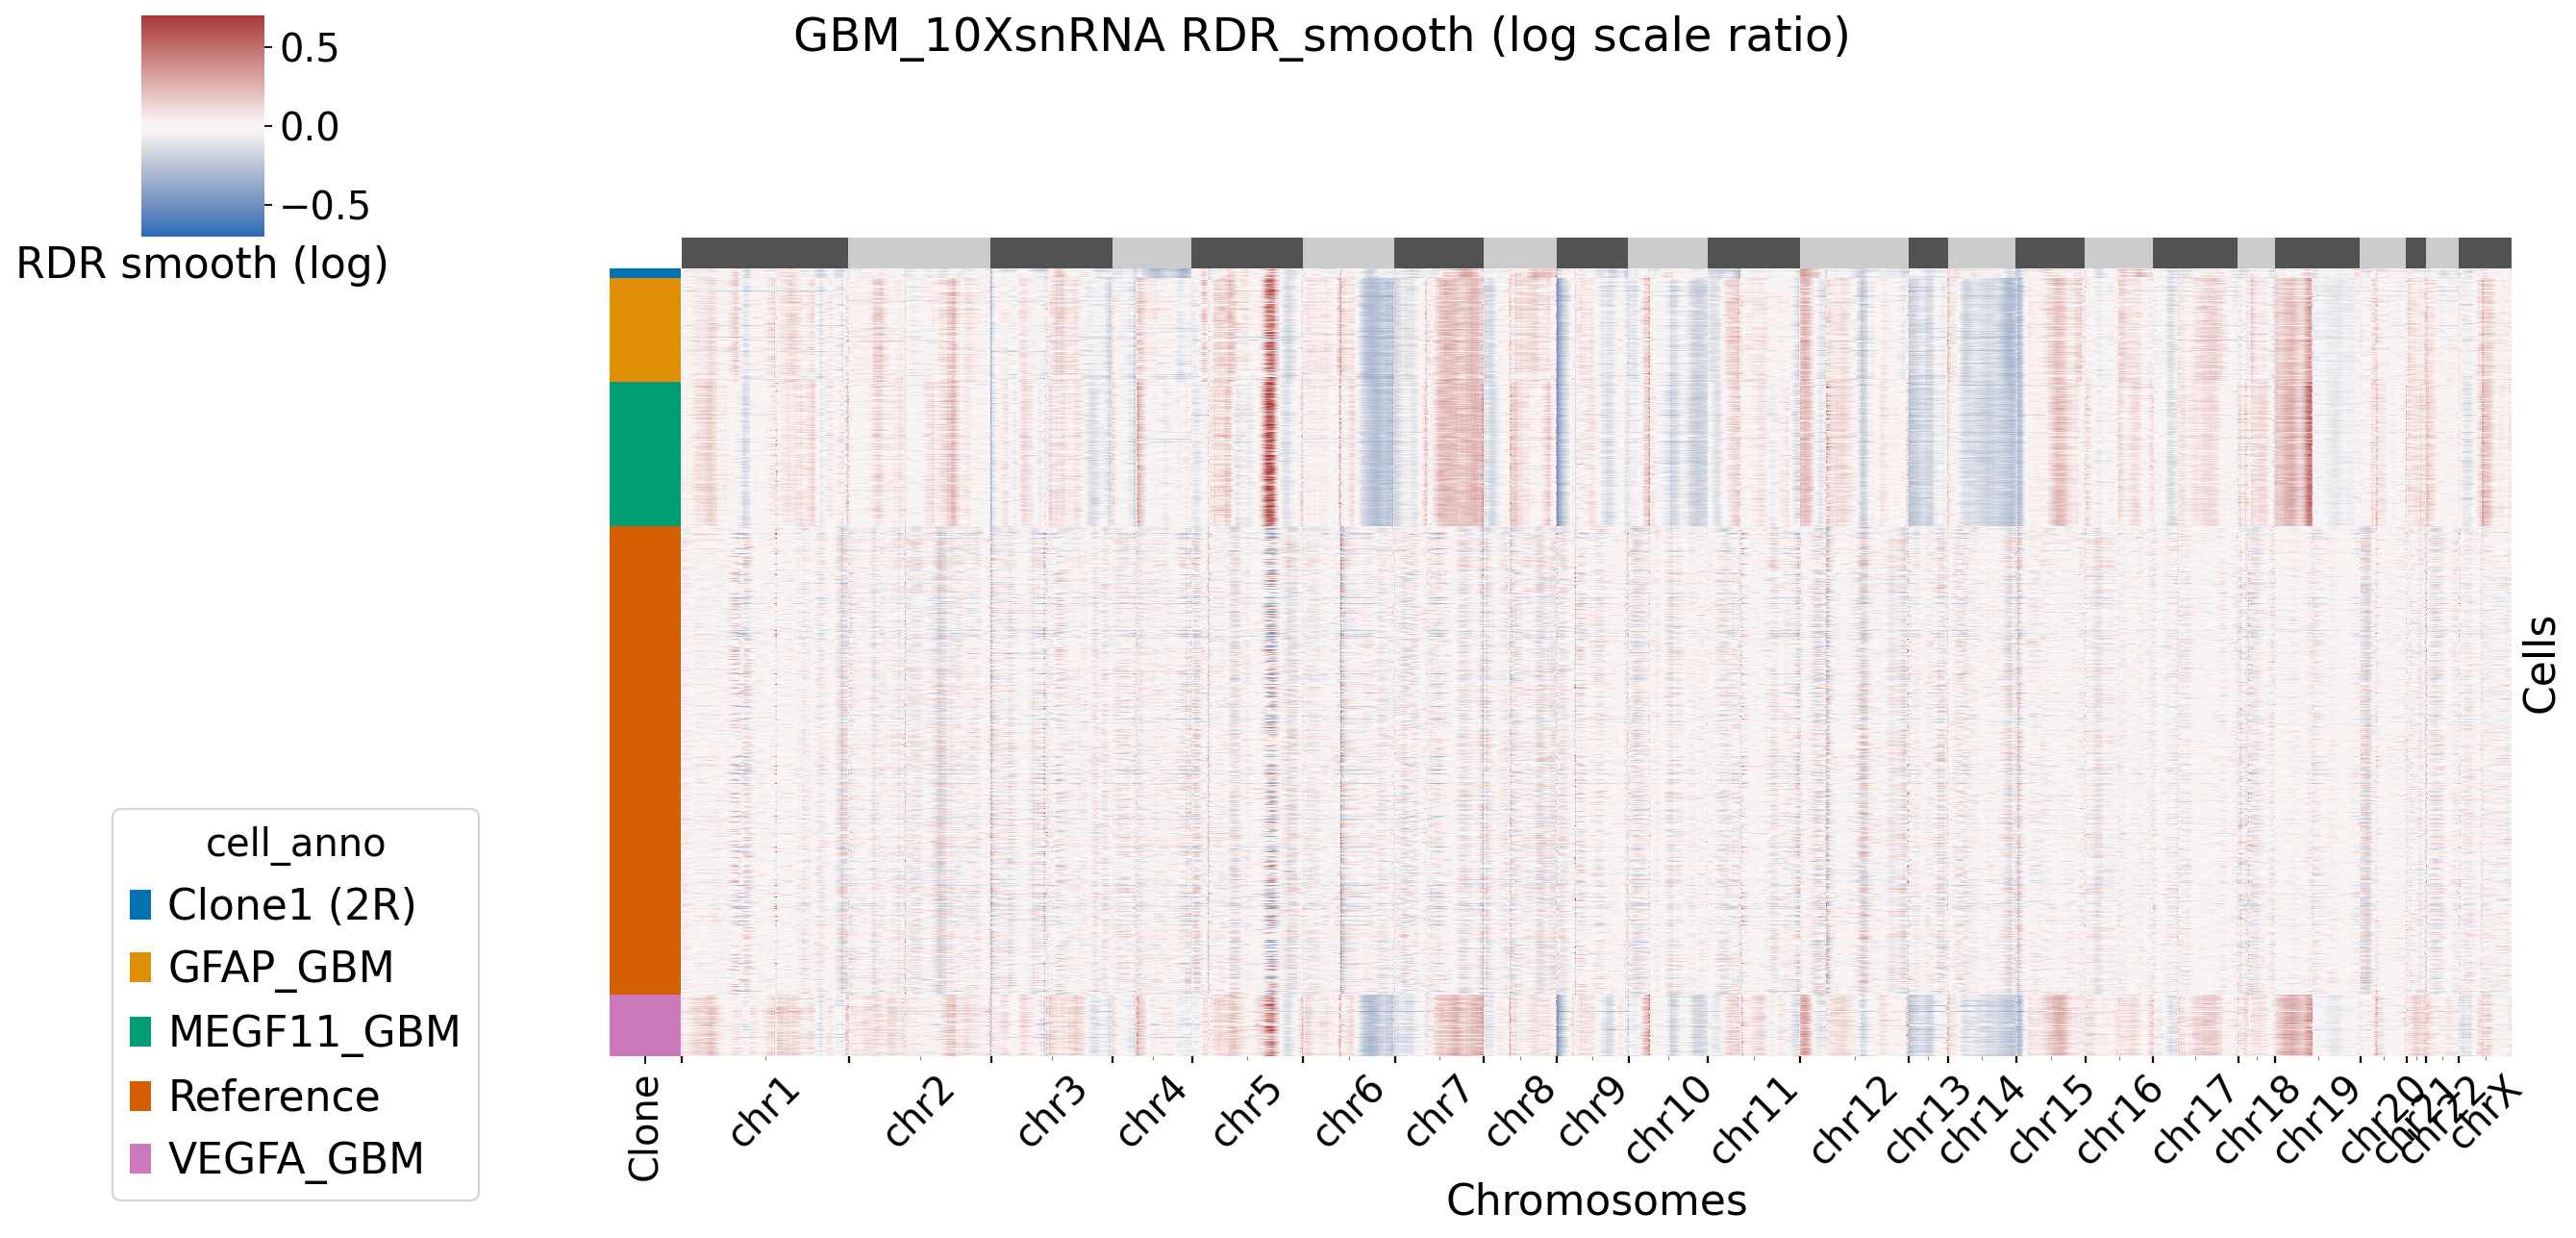

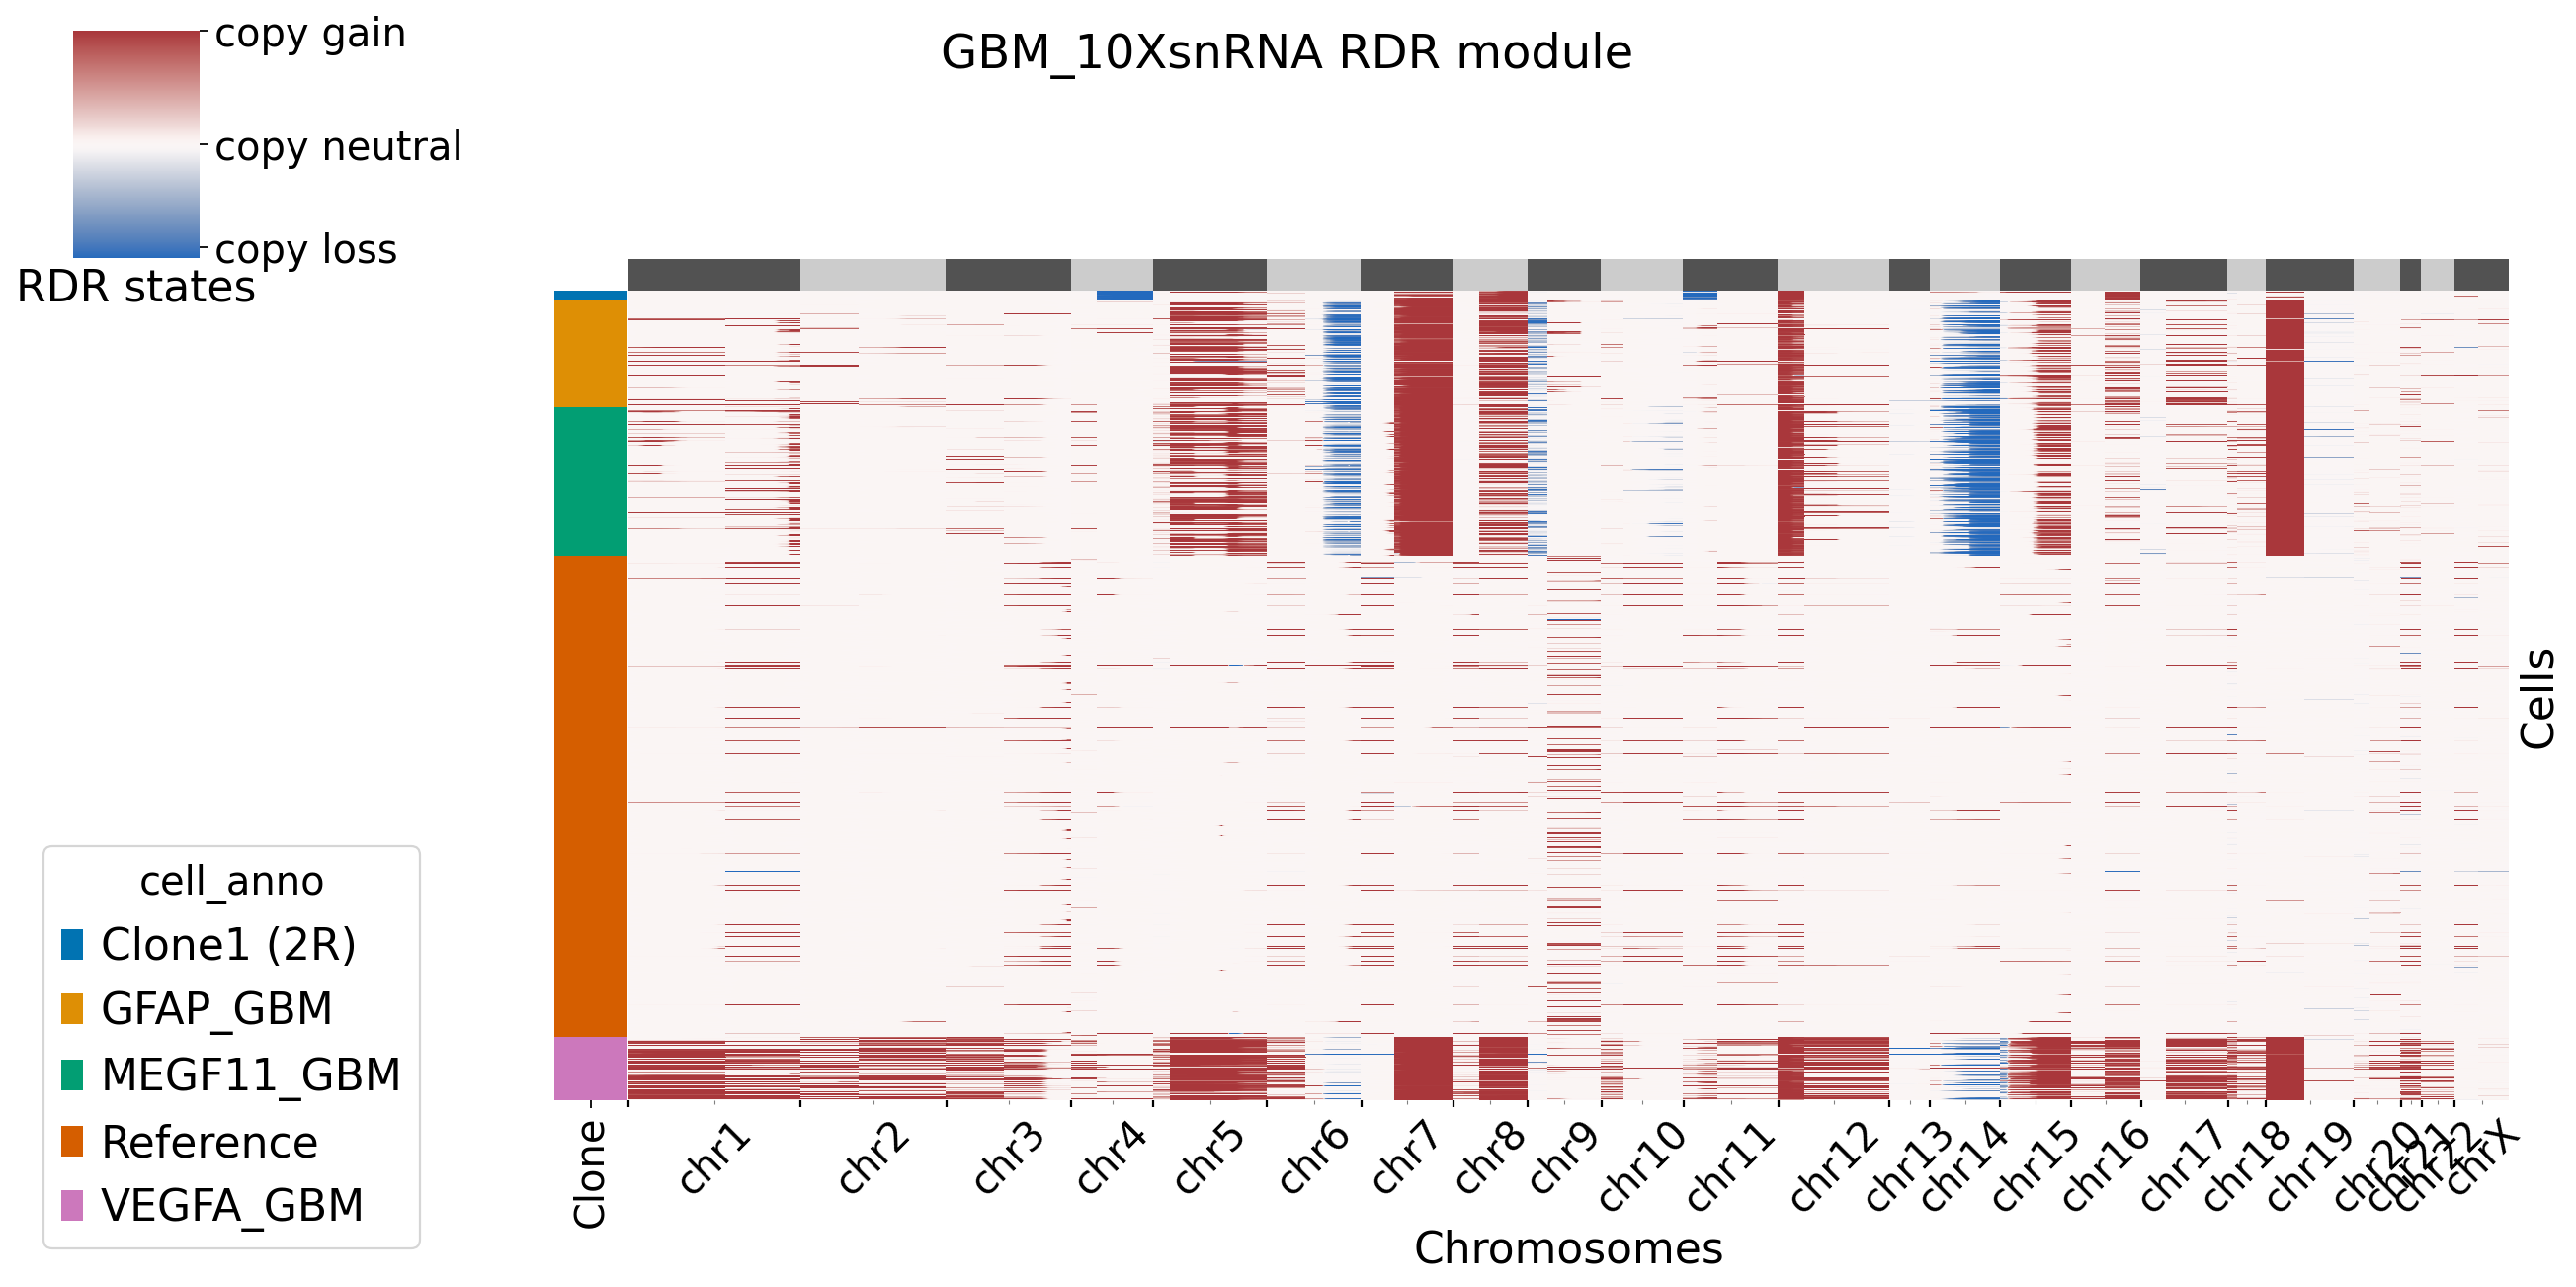

In [5]:
## RDR
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "RDR")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "Normal"
xconfig.marker_group_anno_key = "phenotype"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cell_anno"
xconfig.display()

RDR_Xdata = xclone.model.run_RDR(RDR_adata,
            config_file = xconfig)

BAF 
Configurations:
BAF_add                        None
BAF_denoise                    True
BAF_denoise_GMM_comp           2
BAF_denoise_GMM_detection      True
BAF_denoise_cellprop_cutoff    0.05
CNV_N_components               5
HMM_brk                        chr_arm
KNN_Xlayer                     fill_BAF_phased
KNN_connect_use_key            connectivities_expr
KNN_neighbors                  10
RDR_file                       None
WMA_smooth_key                 chr_arm
WMA_window_size                101
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /groups/cgsd/rthuang/Results/GBM/demoresults
_plot_suffix                   
_start                         1703301189.0017323
_vector_friendly               True
baf_bias_mode                  1
bin_nproc                      40
cell_anno_key                  cell_type
concentration                  100
concentration_lower            20
concentrat

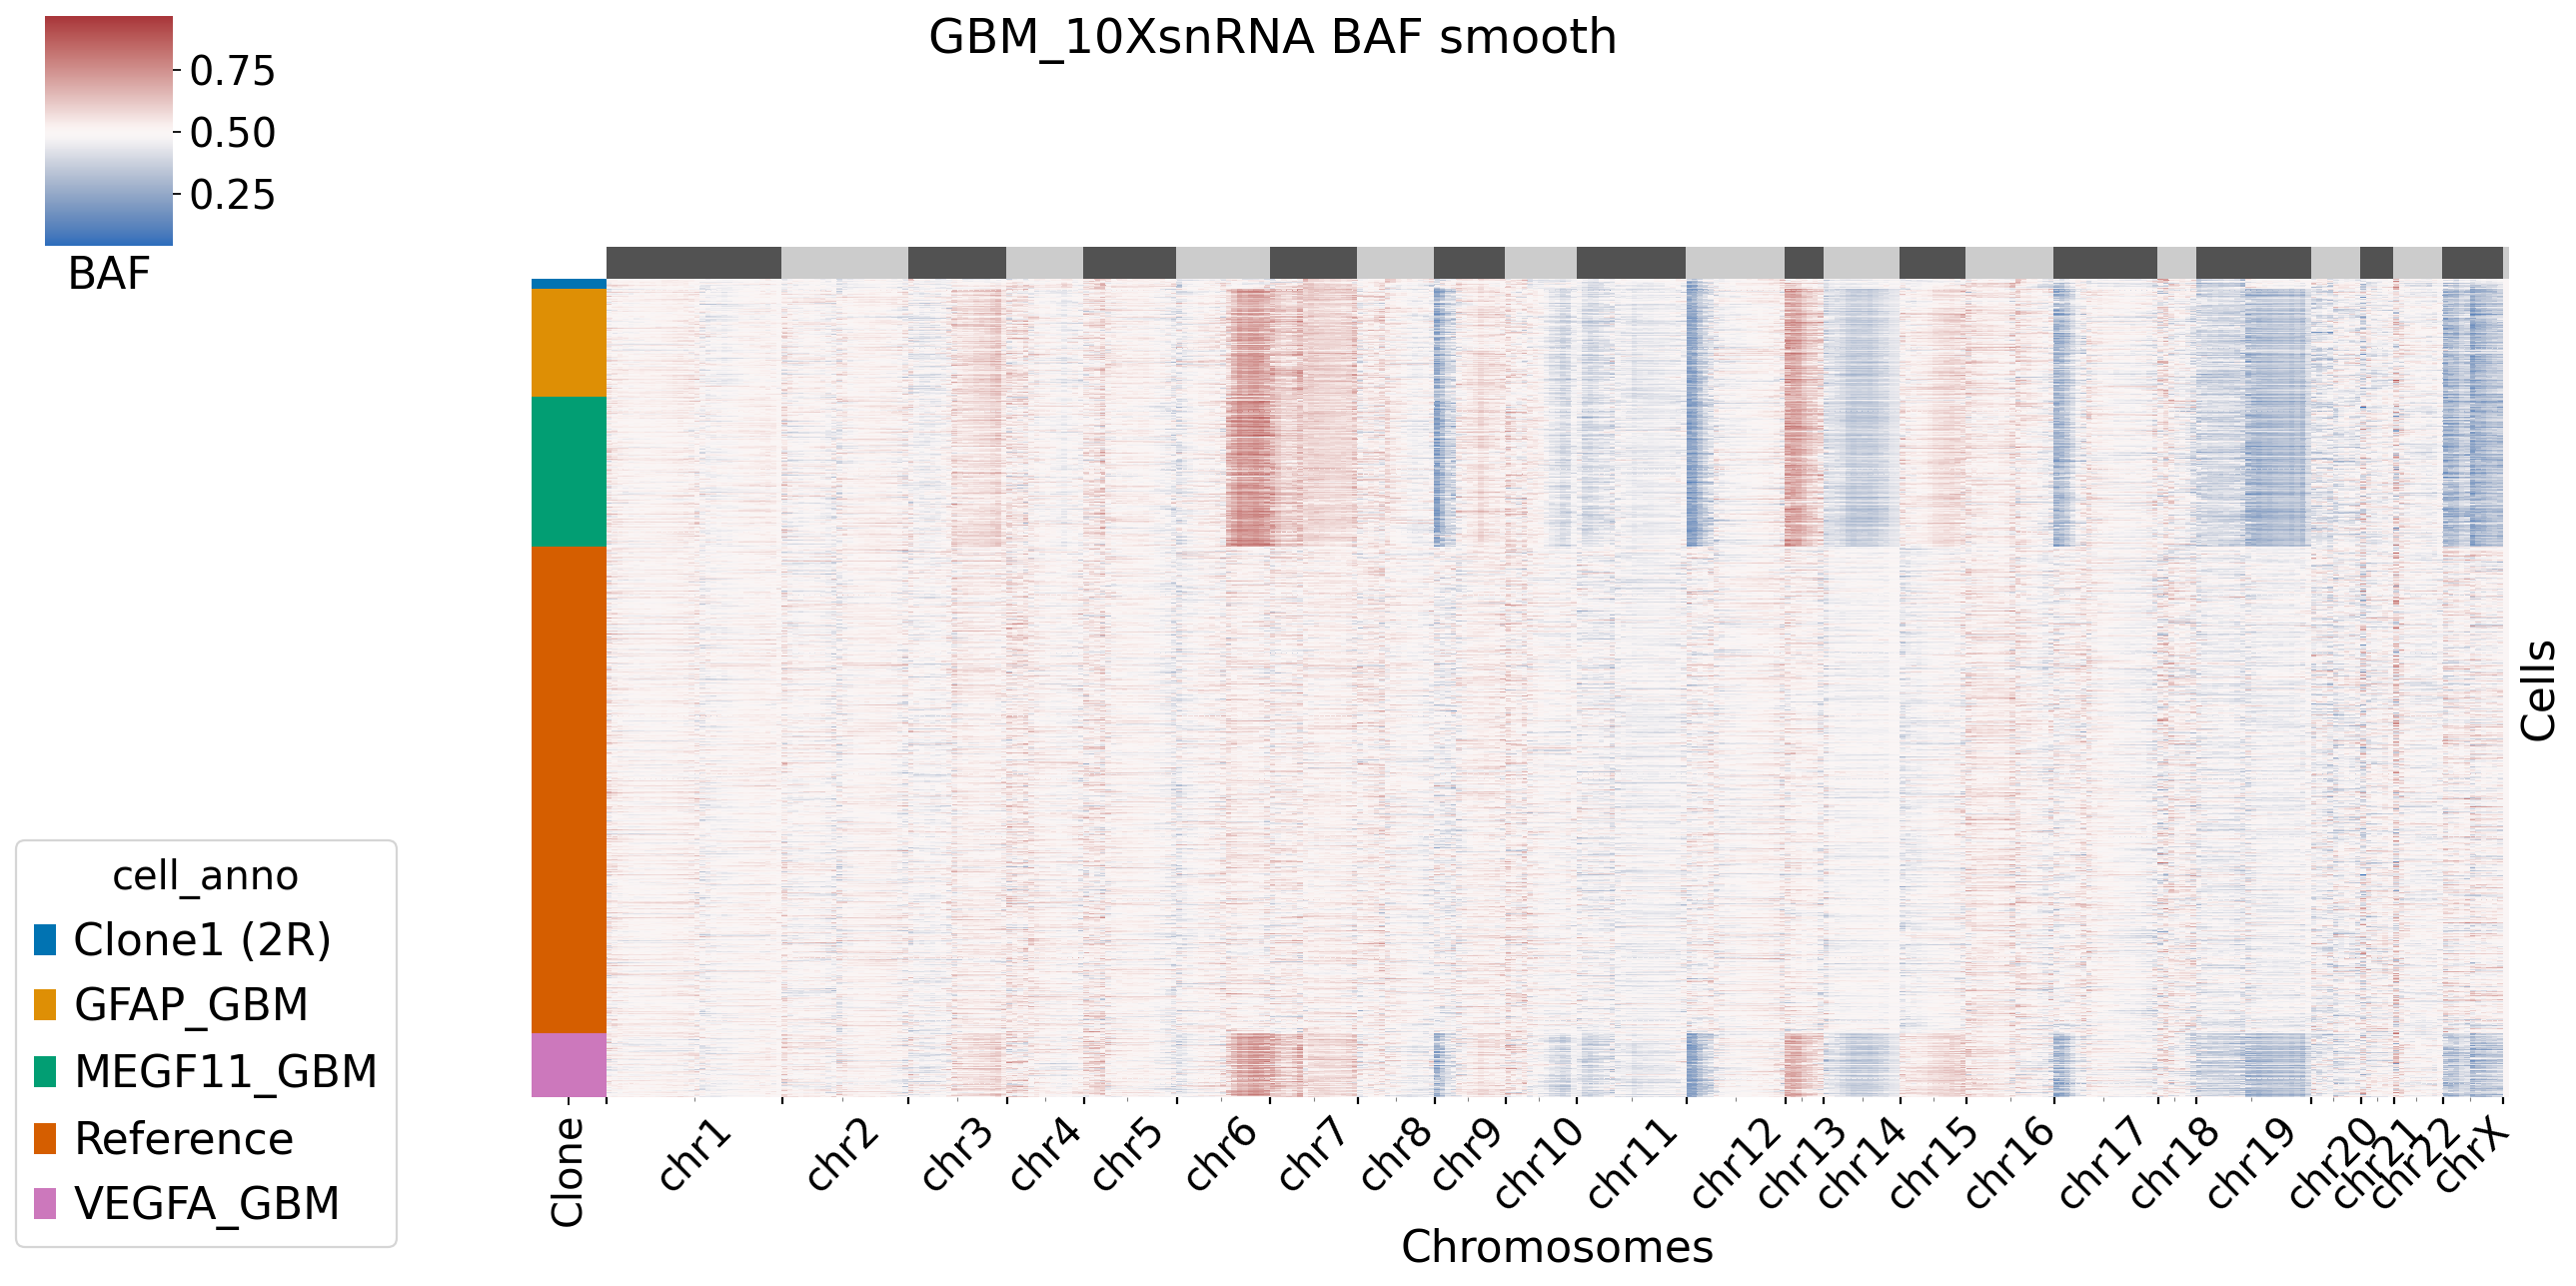

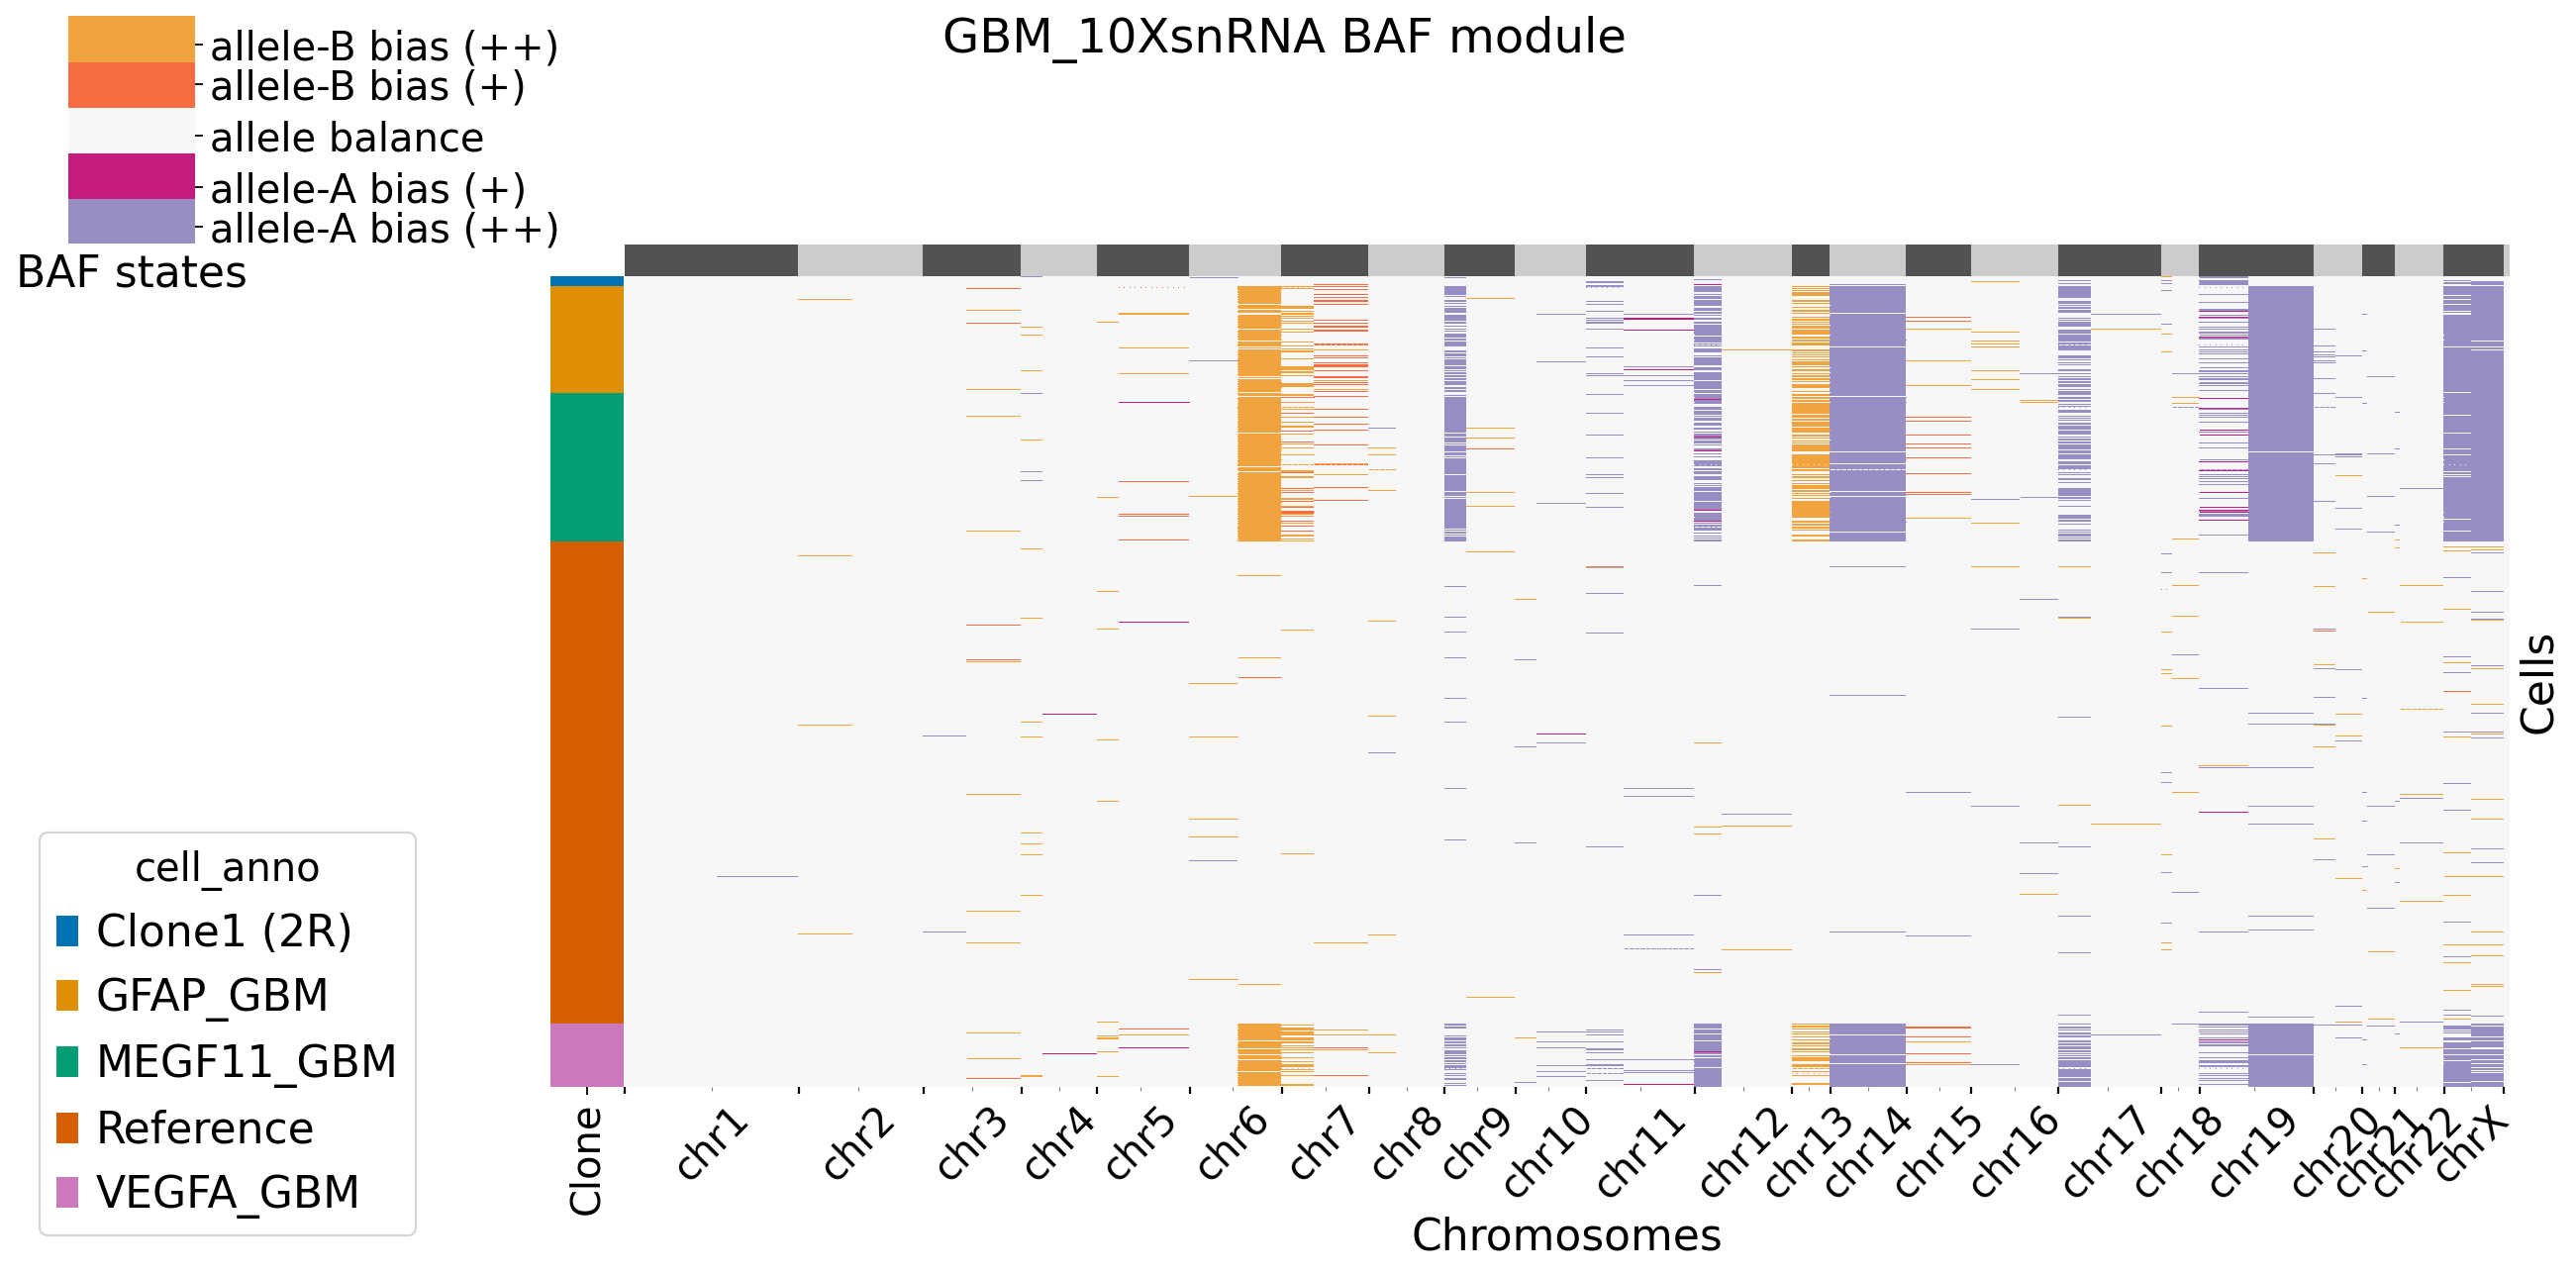

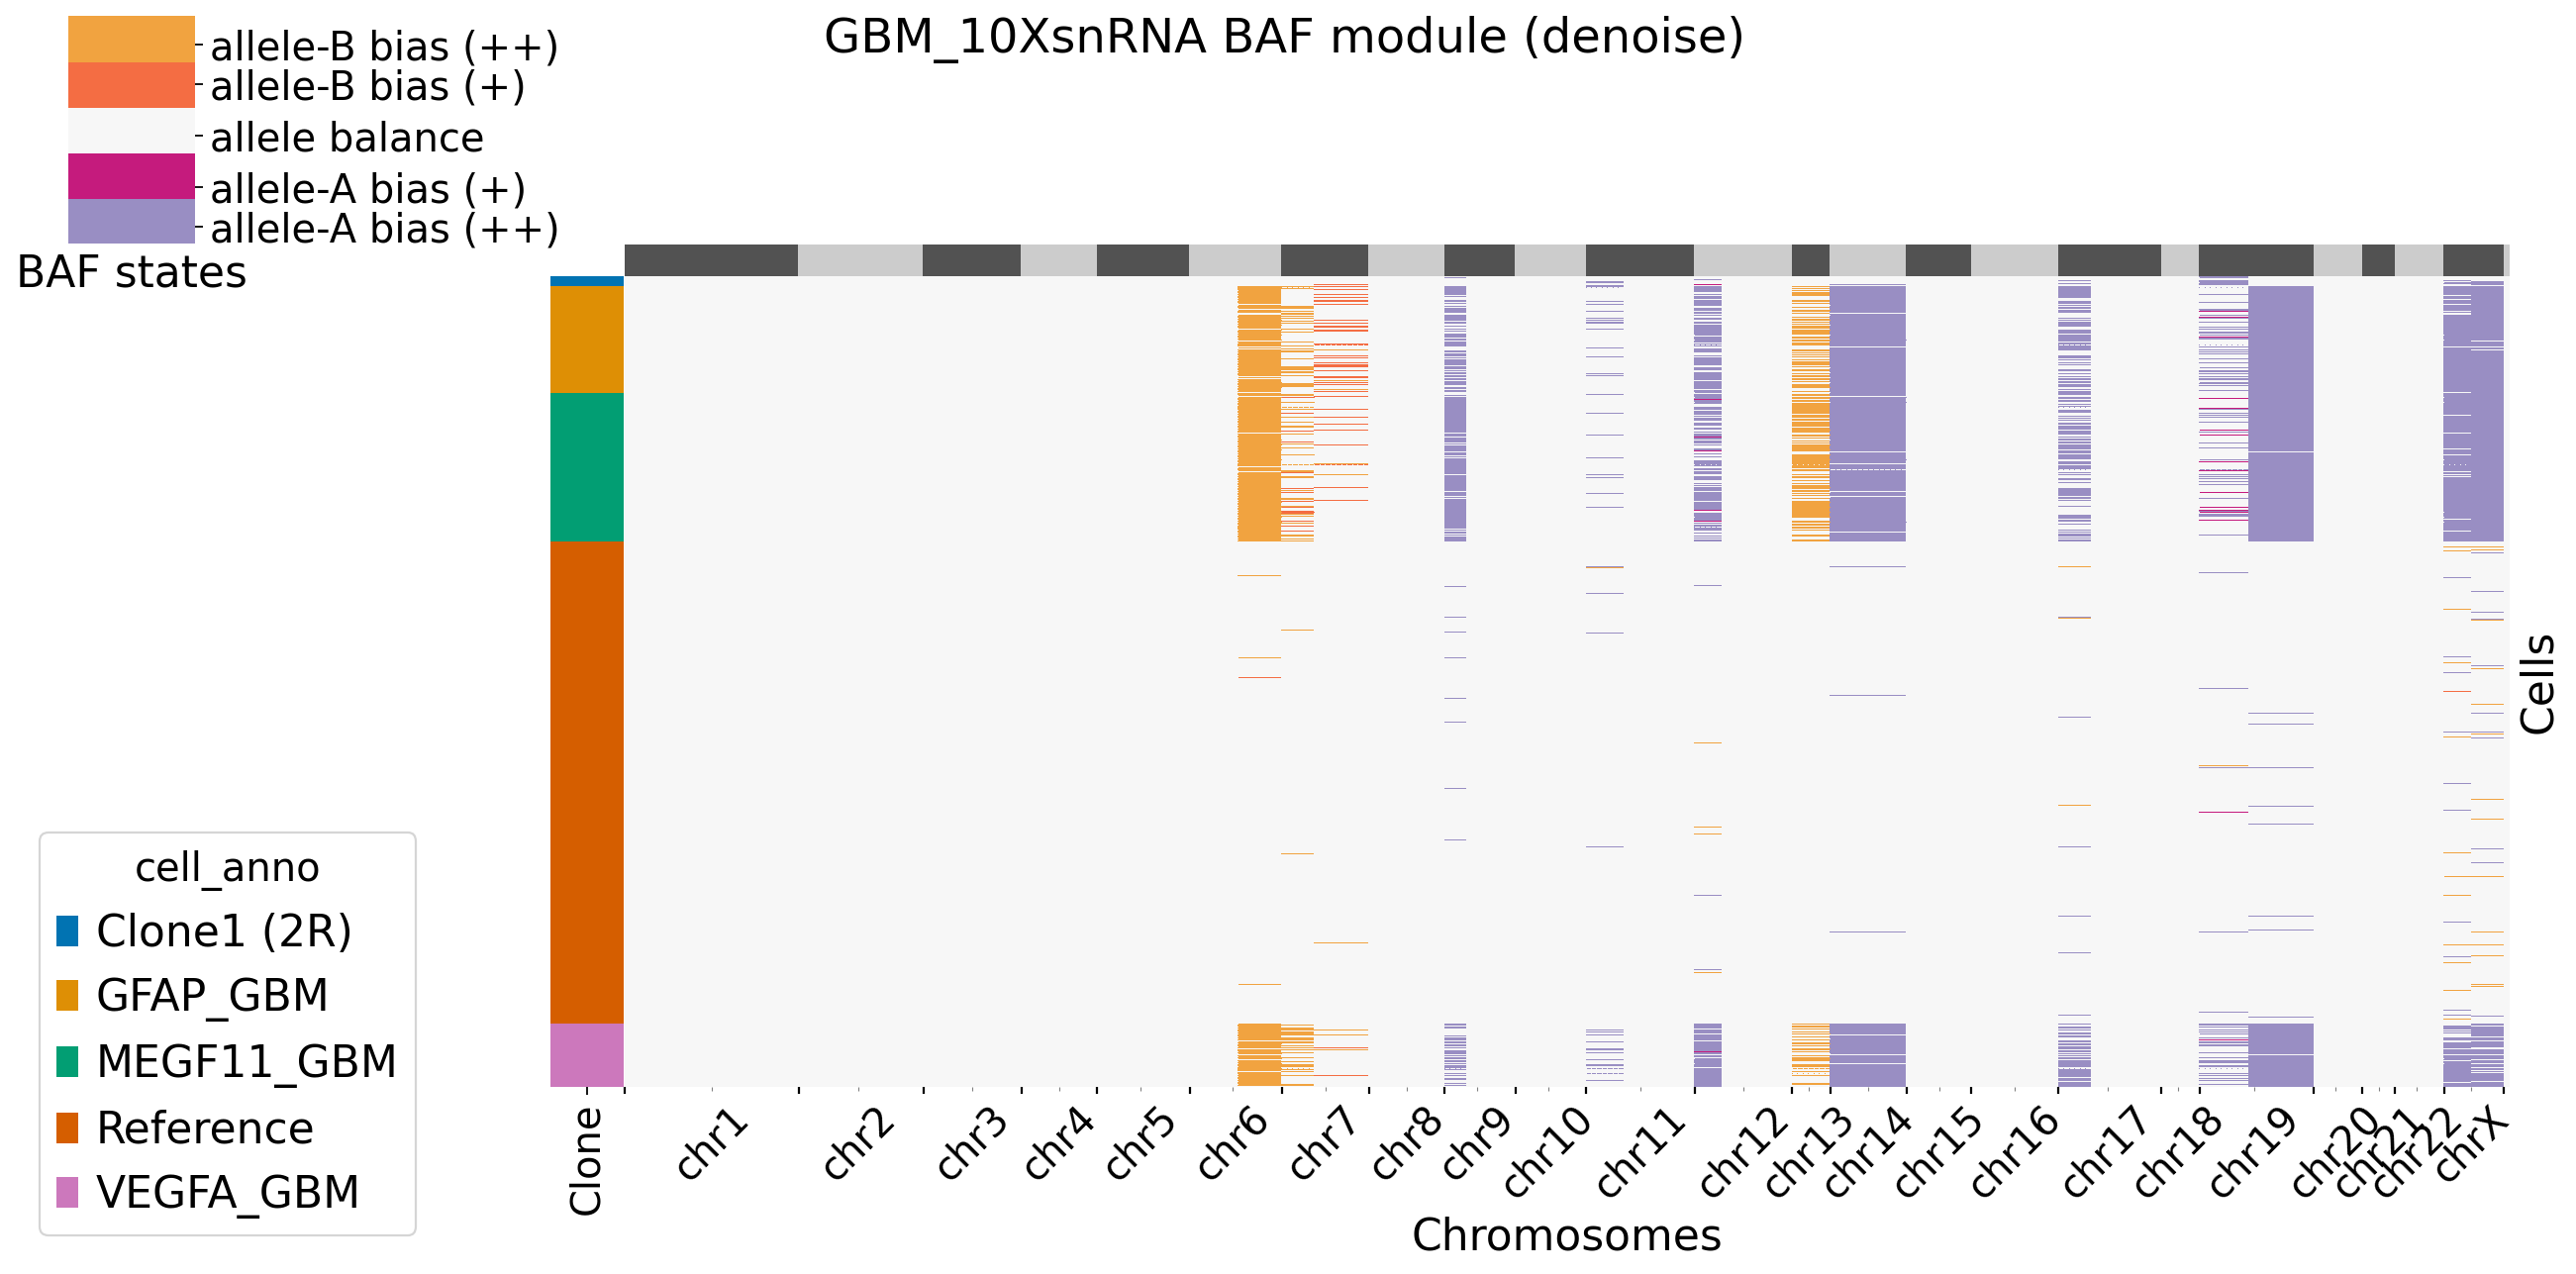

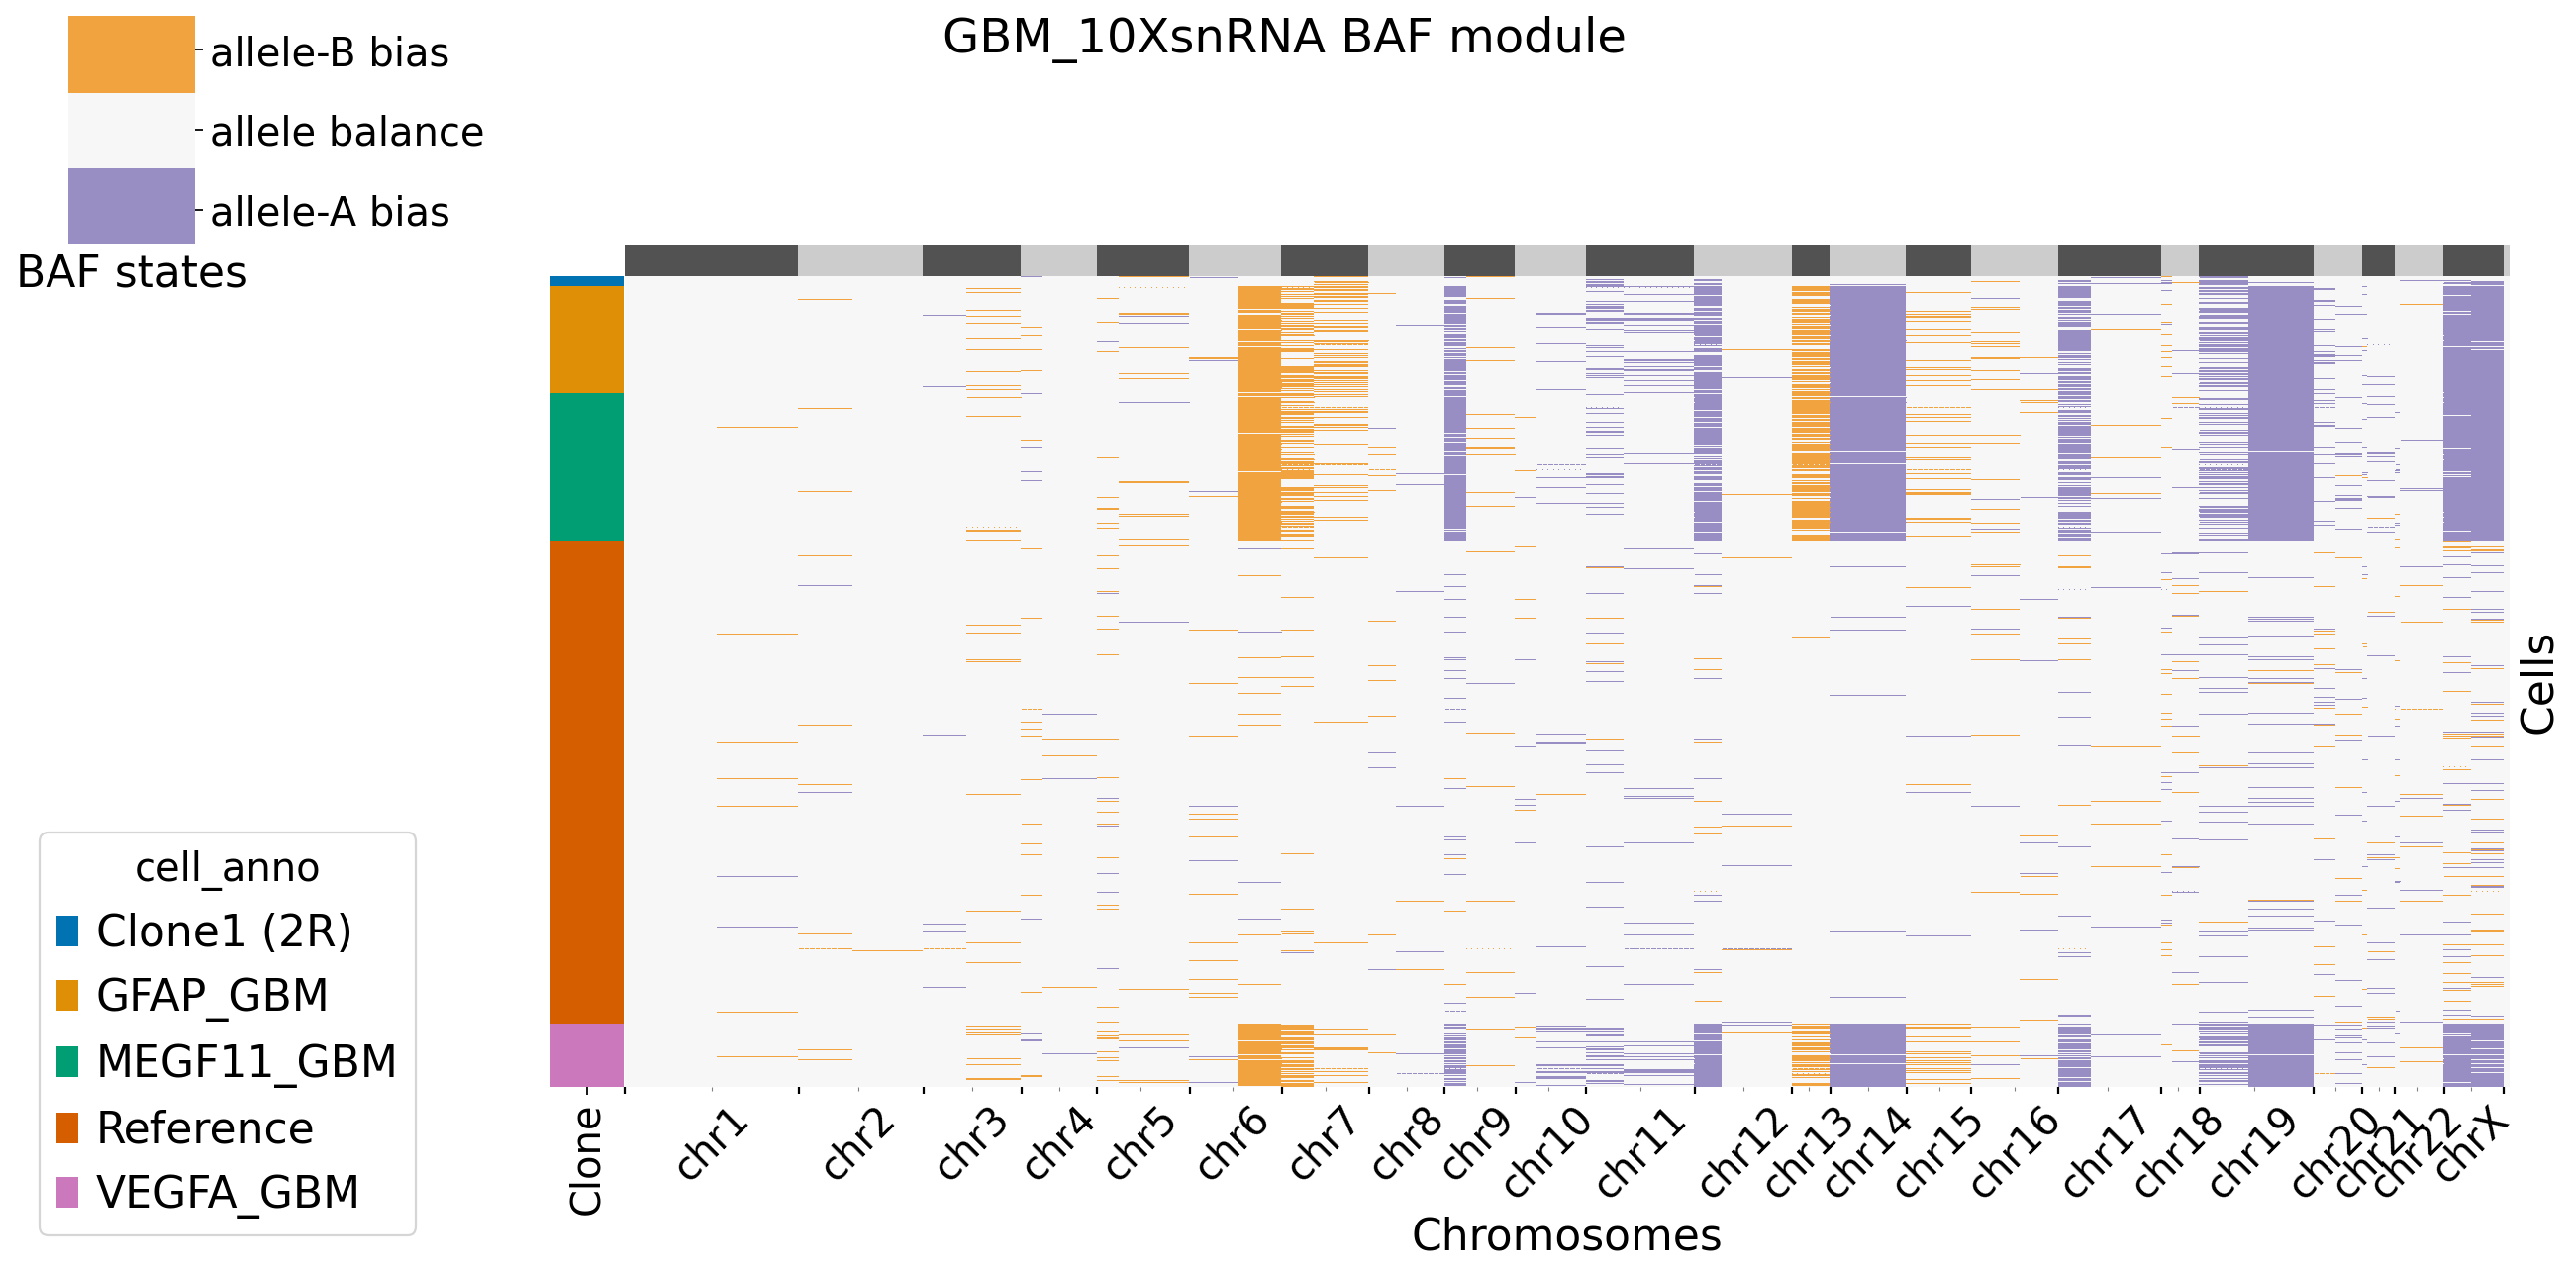

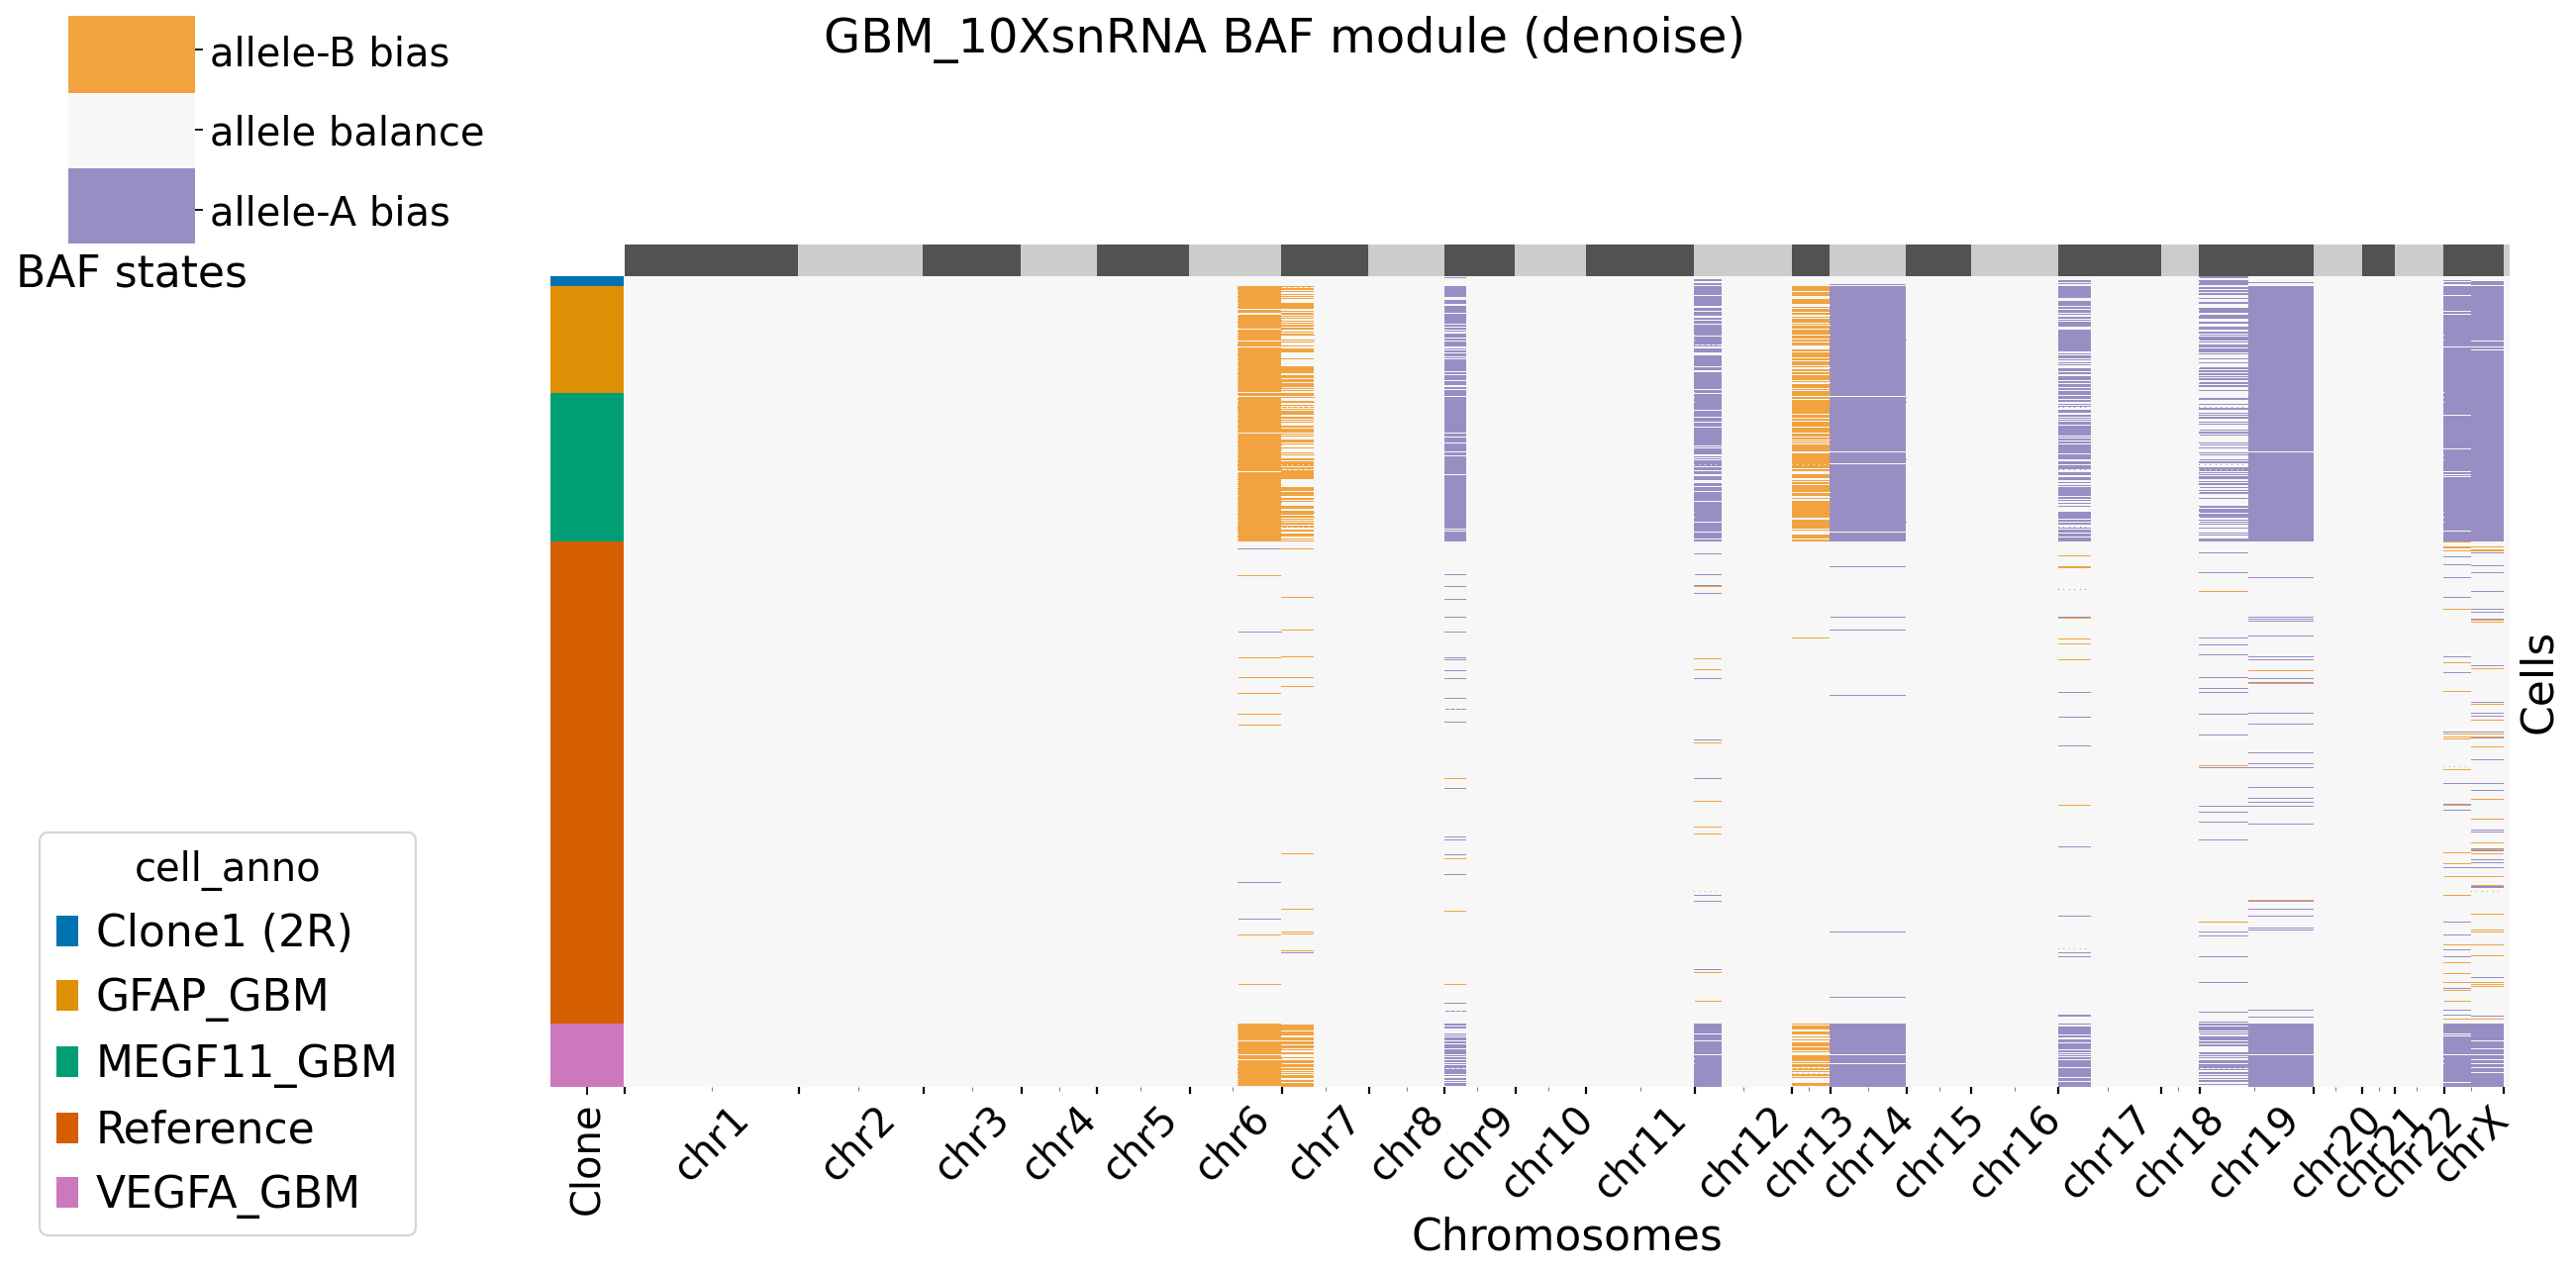

In [6]:
## BAF
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "BAF")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "Normal"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cell_anno"
xconfig.bin_nproc=40
xconfig.display()

BAF_merge_Xdata = xclone.model.run_BAF(BAF_adata,
            config_file = xconfig)


Combine 
Configurations:
BAF_denoise                    True
KNN_neighbors                  10
RDR_denoise                    False
RDR_prior                      True
WGD_cell_prop_threshold        50
WGD_detect_genome_level        chr_arm
WGD_detection                  True
WGD_prop_value_threshold       0.9
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /groups/cgsd/rthuang/Results/GBM/demoresults
_plot_suffix                   
_start                         1703301490.8429124
_vector_friendly               True
cell_anno_key                  cell_type
copygain_correct               False
copygain_correct_mode          None
copyloss_correct               True
copyloss_correct_mode          1
dataset_name                   GBM_10XsnRNA
exclude_XY                     True
file_format_data               h5ad
file_format_figs               pdf
merge_loh                      False
merge_loss      

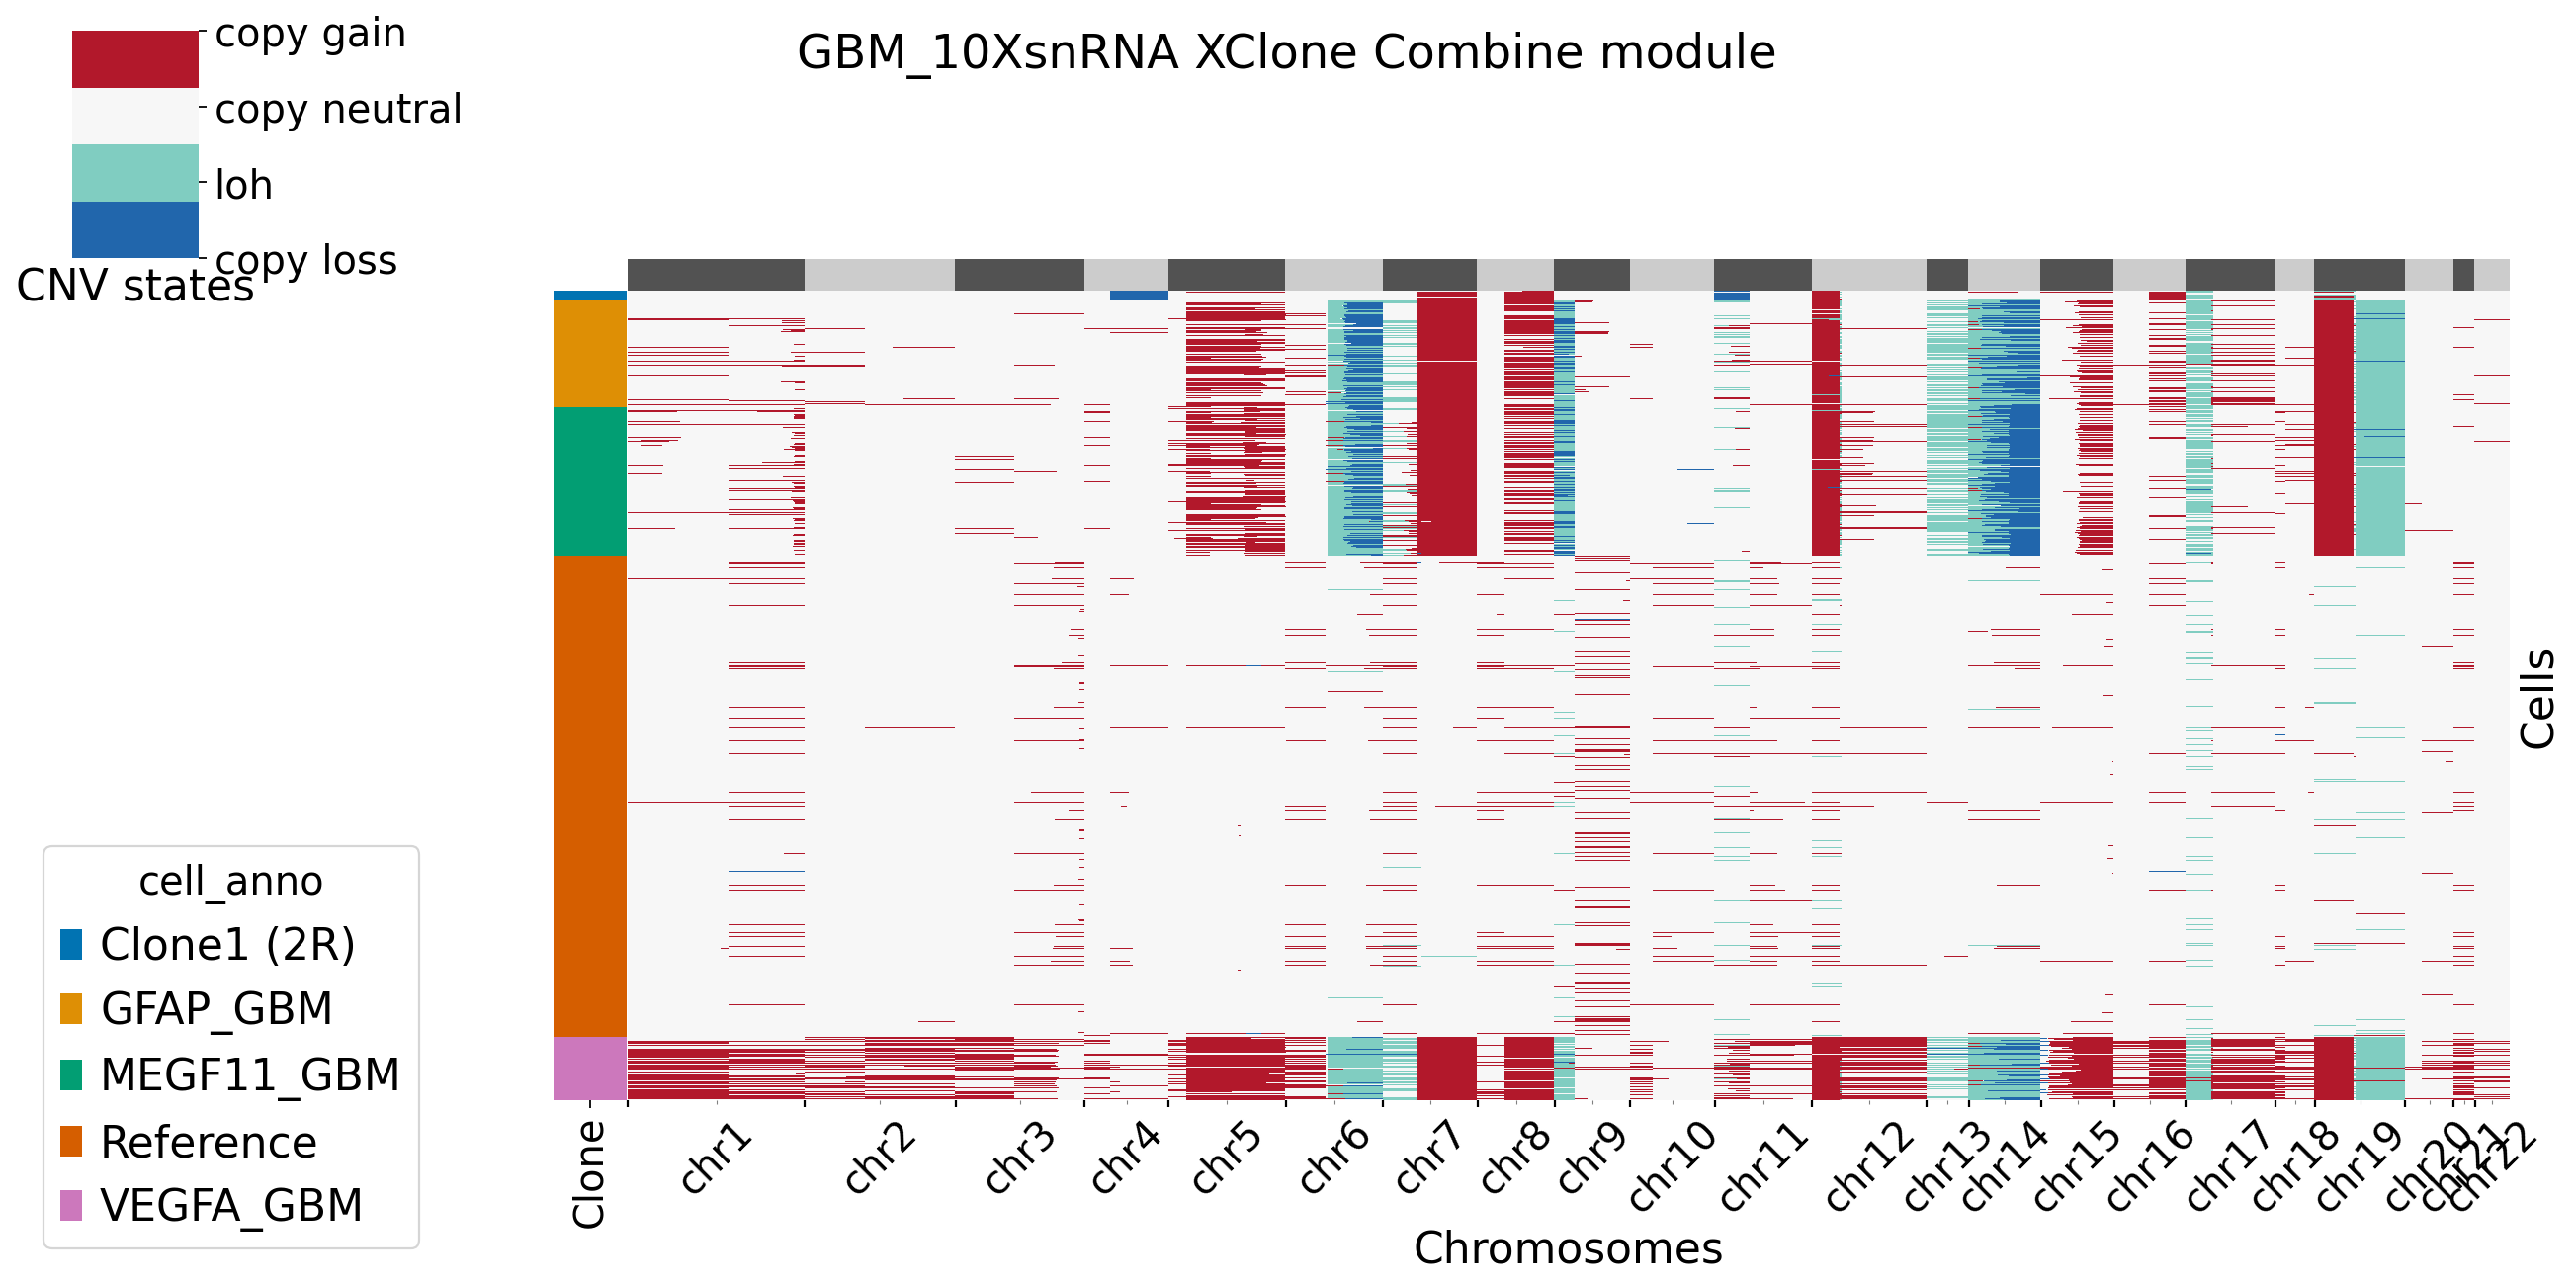

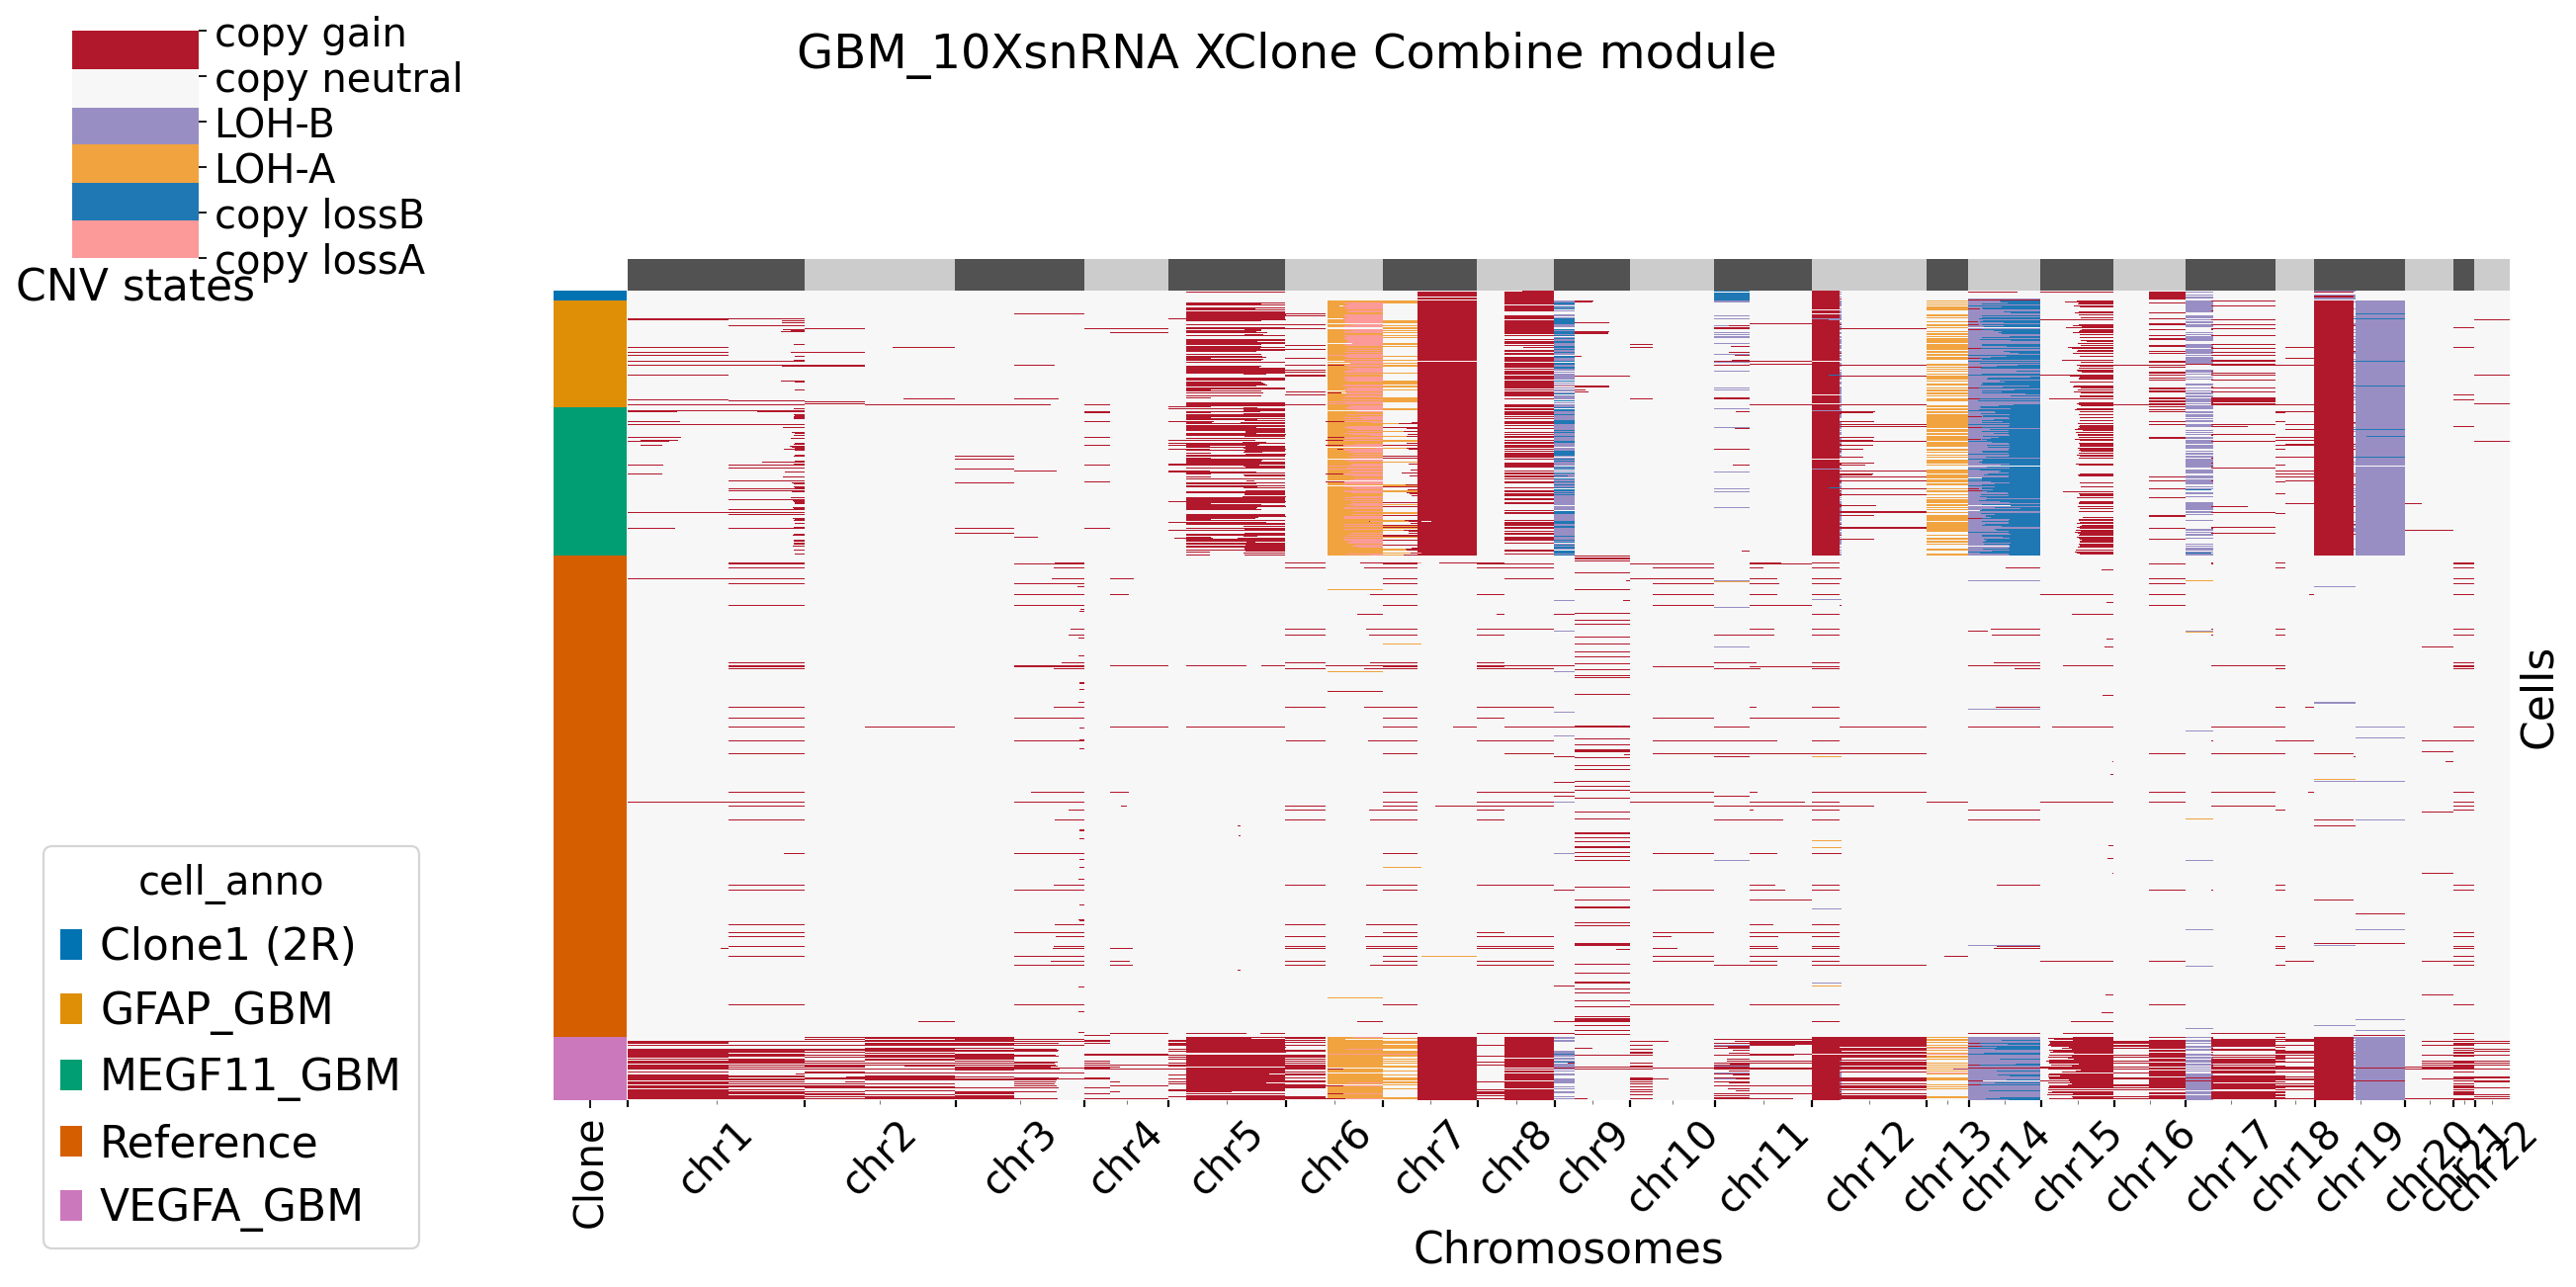

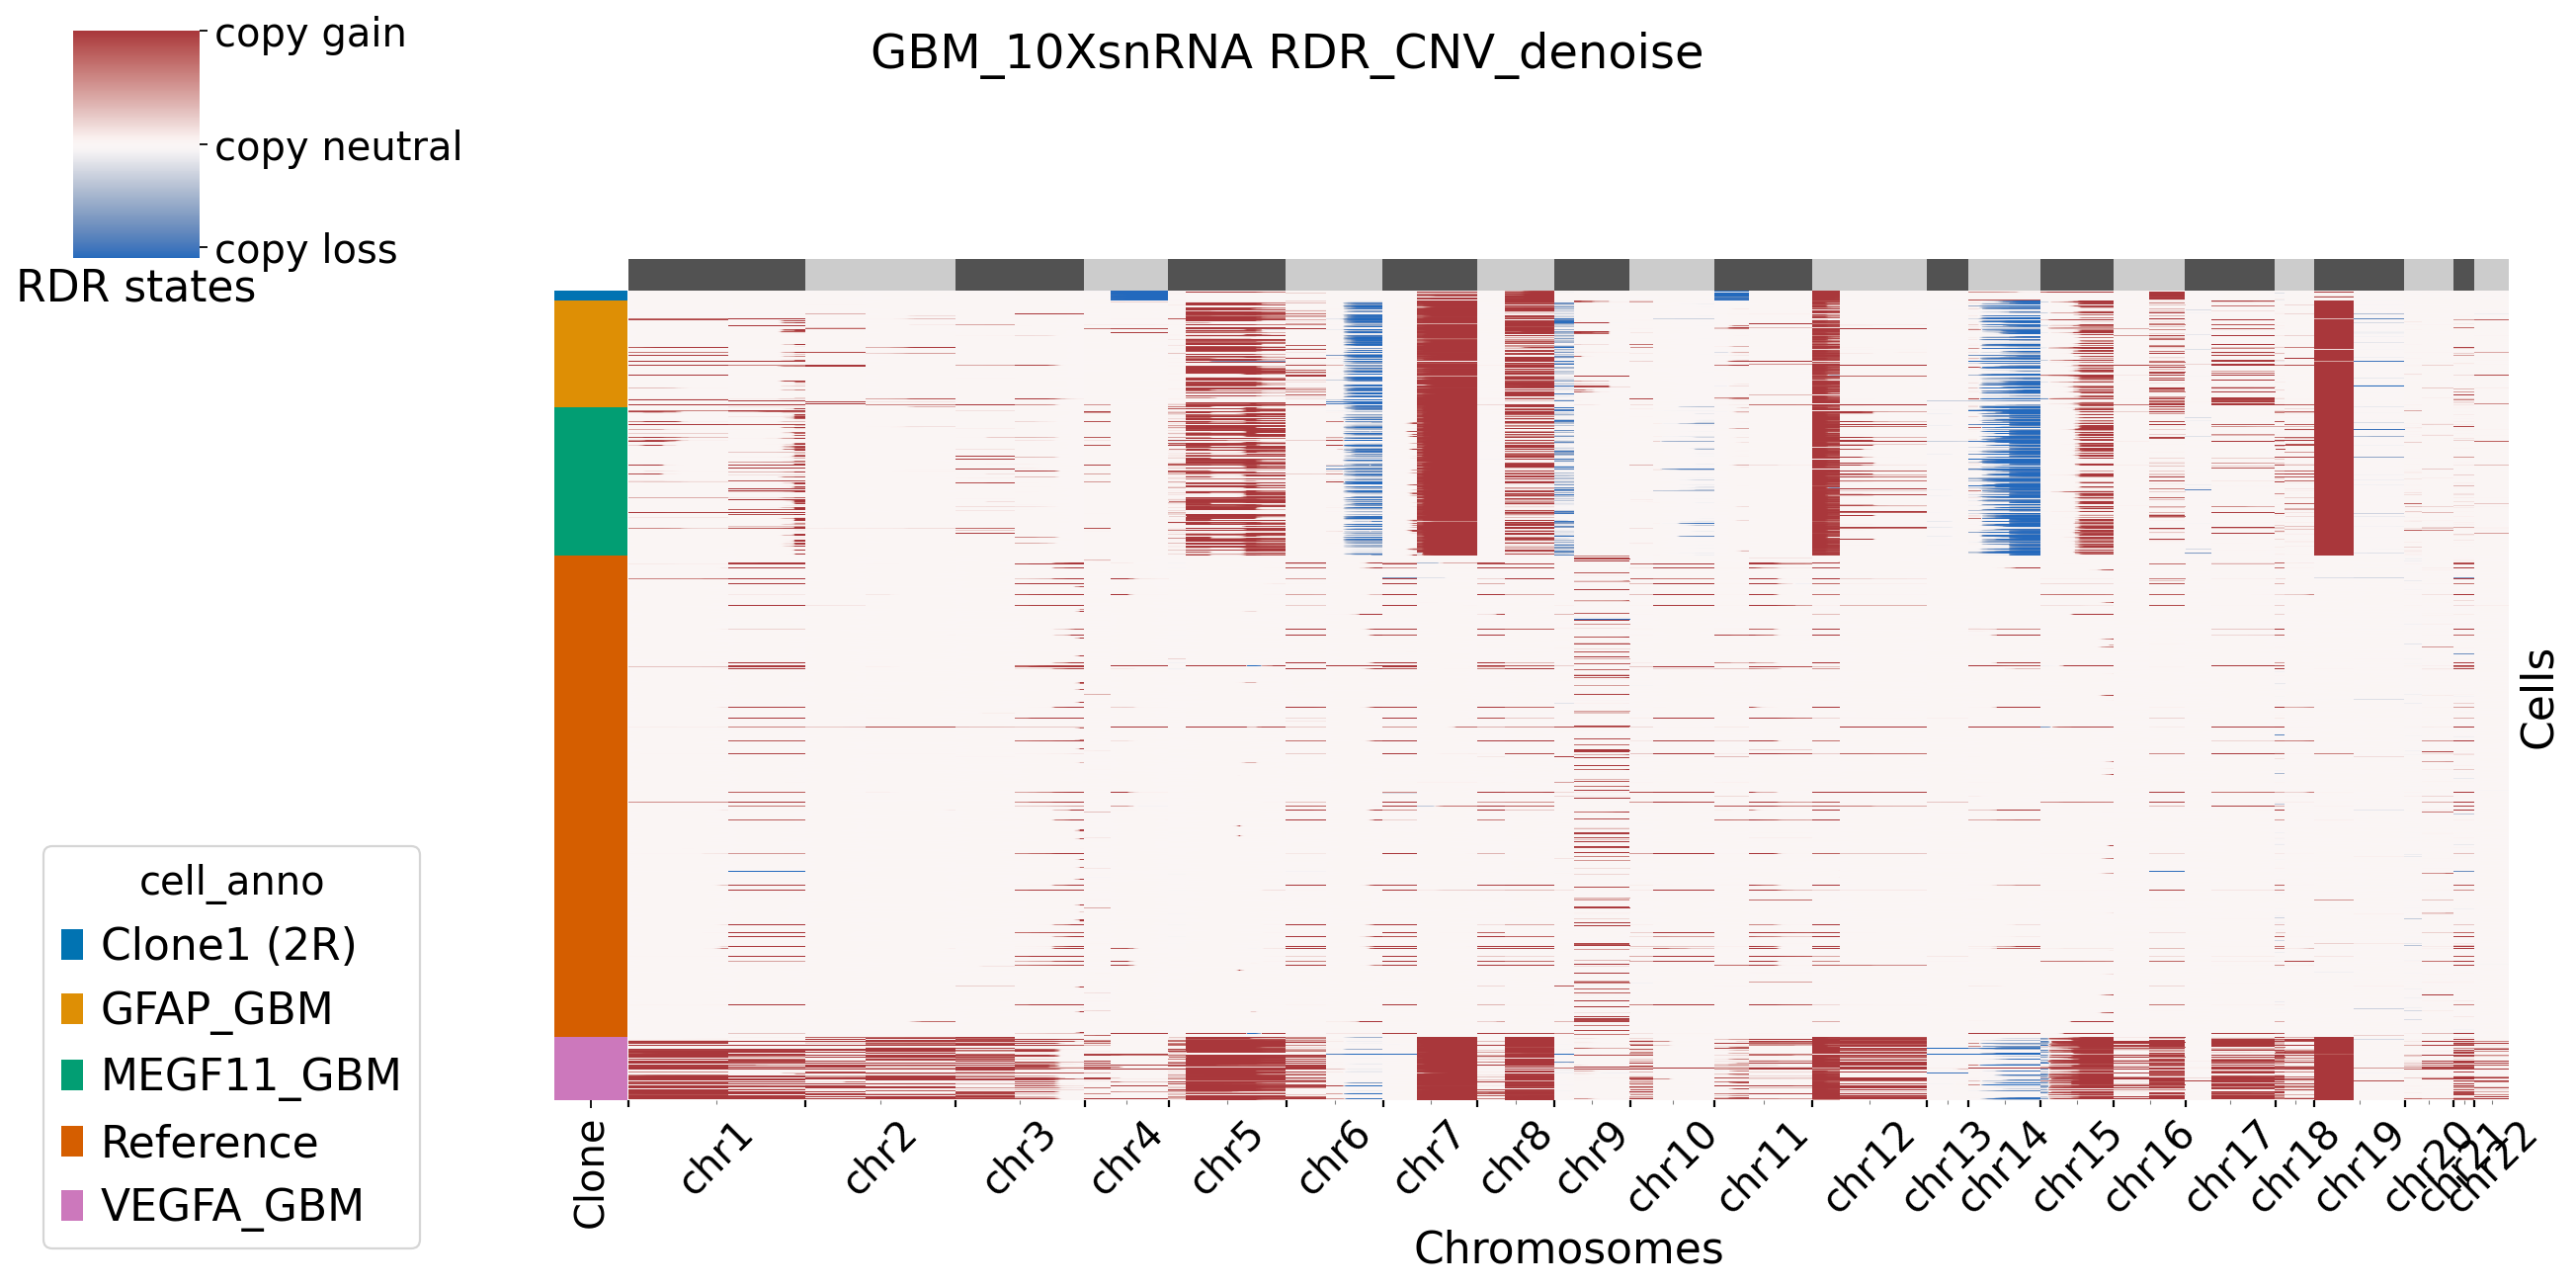

In [7]:
## Combine
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "Combine")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "Normal"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cell_anno"
xconfig.merge_loss = False
xconfig.merge_loh = False
xconfig.BAF_denoise = True
xconfig.exclude_XY = True
xconfig.display()

combine_Xdata = xclone.model.run_combine(RDR_Xdata,
                BAF_merge_Xdata,
                verbose = True,
                run_verbose = True,
                config_file = xconfig)